In [212]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pandas as pd

358


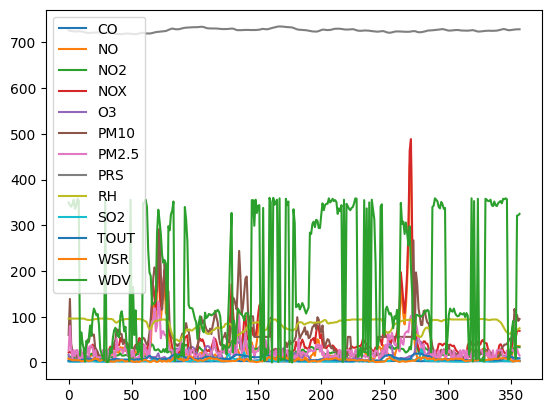

In [213]:
data = pd.read_csv('PSO_Testfile2.csv')
data.plot()
print(len(data))

In [214]:
# As its a Char variable we can change it or delete it
# del data['groups']

In [215]:
#Normalizing the data
data_n = data.copy()
data_n = (data - data.min())/(data.max() - data.min())
print(data_n)

           CO        NO       NO2       NOX    O3      PM10     PM2.5  \
0    0.051750  0.012910  0.077295  0.025277  0.28  0.182456  0.171875   
1    0.053272  0.015974  0.074879  0.027784  0.14  0.459649  0.585938   
2    0.038052  0.013786  0.059179  0.022979  0.08  0.119298  0.187500   
3    0.035008  0.011379  0.061594  0.021099  0.08  0.052632  0.031250   
4    0.031963  0.008315  0.053140  0.016712  0.08  0.045614  0.171875   
..        ...       ...       ...       ...   ...       ...       ...   
353  0.132420  0.048359  0.301932  0.097974  0.04  0.382456  0.179688   
354  0.147641  0.041138  0.311594  0.092751  0.06  0.326316  0.093750   
355  0.150685  0.069584  0.336957  0.124295  0.04  0.336842  0.203125   
356  0.129376  0.072210  0.328502  0.125339  0.04  0.291228  0.117188   
357  0.123288  0.071554  0.322464  0.123668  0.02  0.305263  0.078125   

          PRS    RH       SO2      TOUT       WSR       WDV  
0    0.485207  1.00  0.037037  0.074272  0.553846  0.972222  

In [216]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats itself annually, 3 if it is trimestrial etc.
# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

# dimensions = 12
# data_cn = pd.concat([data_n.shift(i) for i in range(0 + dimensions + 1)], axis= 1)
# print (data_cn)

In [217]:
# Splitting data
from sklearn.model_selection import train_test_split
X = data_n.iloc[1:, 1:]
y = data_n.iloc[1:, 0]
print('printing X')
print(X)
print('\n\n printing Y')
print(y)
print(data_n)

# Split the dataset into training, validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, shuffle=False)

print('printing X TRAIN')
print(X_train)
print('\n\n printing X VAL')
print(X_val)
print('\n\n printing x TEST \n')
print(X_test)

print('printing Y TRAIN')
print(y_train)
print('\n\n printing Y VAL')
print(y_val)
print('\n\n printing Y TEST \n')
print(y_test)

print(len(y_val))
print(len(y_test))
print(len(y_train))


printing X
           NO       NO2       NOX    O3      PM10     PM2.5       PRS    RH  \
1    0.015974  0.074879  0.027784  0.14  0.459649  0.585938  0.443787  1.00   
2    0.013786  0.059179  0.022979  0.08  0.119298  0.187500  0.420118  1.00   
3    0.011379  0.061594  0.021099  0.08  0.052632  0.031250  0.384615  1.00   
4    0.008315  0.053140  0.016712  0.08  0.045614  0.171875  0.366864  1.00   
5    0.005252  0.026570  0.009192  0.08  0.052632  0.070312  0.360947  1.00   
..        ...       ...       ...   ...       ...       ...       ...   ...   
353  0.048359  0.301932  0.097974  0.04  0.382456  0.179688  0.603550  0.52   
354  0.041138  0.311594  0.092751  0.06  0.326316  0.093750  0.627219  0.52   
355  0.069584  0.336957  0.124295  0.04  0.336842  0.203125  0.633136  0.50   
356  0.072210  0.328502  0.125339  0.04  0.291228  0.117188  0.633136  0.54   
357  0.071554  0.322464  0.123668  0.02  0.305263  0.078125  0.639053  0.58   

          SO2      TOUT       WSR       

In [218]:
#Function that displays tridimensional plot
def plot(some_list):
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r') 
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('S\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()
    
    print('\n')
    print('\n')

In [219]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predict_test = predictions
    
    #To un-normalize the data:    
    #Multiply the values by data.to_numpy().max()
    
    plt.plot(range(len(y_test)), y_test, label='Real')    
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')    
    plt.legend()    
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)    
    print('\n') 
    print("\n")    
    print('Mean Squared Error for the Test Set: \t %f' %mse)    
    print('\n')    
    print('\n')    
    print('Predictions Average: \t %f' %((predict_test.sum()/len(predict_test))))    
    print('\n')    
    print('\n')    
    print('Predictions Median:\t %f' %(st.median(predict_test)))    
    print('\n')    
    print('\n')

In [220]:
def pso(n_particles, iterations, dimensions, inertia):
    #Range of SVR's hyperparameters (Particles' search space)
    #C, Epsilon and Gamma

    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1 
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3

    # Initializing particles positions randomly, inside the search space

    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g
    c = np.concatenate((x,y,z), axis=1)
    
    #print(c)
    print('//////////////')
    #Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2

    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize

    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    #Initializing regression variables 
    p_best_RGS = np.empty((n_particles), dtype = object)
    g_best_RGS = sys.maxsize

    # Displaying tridimensional search space 
    plot(c)

    from sklearn.metrics import mean_squared_error
    for i in range(iterations):
        for j in range(n_particles):
            # print('\n J')
            # print(j)
            # print('\n printing GLOBAL BEST VALUE')
            # print(g_best_val)
            # print('\n printing cj')
            # print(c[j])
            #Starting Regression
            # print('printing cj0')
            # print(c[j][0])
            # print('\n\n printing cj1')
            # print(c[j][1])
            # print('\n\n printing cj2')
            # print(c[j][2])
            rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

            # print('\n\n printing X VAL')
            # print(X_val)
            # Fitting the curve 
            rgs.fit(X_train, y_train) 
            y_predict = rgs.predict(X_val)
            # print('Y PREDICT')
            # print(y_predict)
            # print('Y VAL')
            # print(y_val)
            # Using Mean Squared Error to verify prediction accuracy 
            mse = mean_squared_error(y_val, y_predict)
            # print('MSEEEE' + str(mse))
            #If mse value for that search point, for that particle, is Less than its personal best point.
            if (mse < p_best_val[j]):
                # The value below represents the current least Mean Squared Error
                p_best_val[j] = mse
                p_best_RGS[j] = rgs

                # The value below represents the current search coordinates for 
                # the particle's current Least Mean Squared Error found
                p_best[j] = c[j].copy()

            # Using auxiliar variable to get the index of the
            # particle that found the configuration with the
            # minimum MSE value
            aux = np.argmin(p_best_val)
            # print('AUXXX')
            # print(aux)

            if(p_best_val[aux] < g_best_val):
                # print("HEREEEE")
                #Assigning Particle's current best MSE to the Group's best 
                g_best_val = p_best_val[aux]
                #Assigning Particle's current best configuration to the Group's best 
                g_best = p_best[aux].copy()
                # Group best regressor: the combination of C, Epsilon and Gamma
                # that computes the best fitting curve 
                g_best_RGS = p_best_RGS[aux]

            rand1 = np.random.random()
            rand2 = np.random.random()

            #The variable below influences directly the particle's velocity.            
            #It can either make it smaller or bigger.
            w = inertia

            #The equation below represents Particle's velocity, which is
            #the rate of change in its position
            v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

            #Change in the Particle's position
            c[j] = c[j] + v[j]
            # print('\n printing vel')
            # print(v[j])
            # print('\n printing cj')
            # print(c[j])

            #Below is a series of conditions that stop the particles from
            #Leaving the search space 
            
            if( c[j][2] < min_g):
                c[j][2] = min_g            
            if( c[j][2] > max_g):
                c[j][2] = max_g
            if( c[j][1] < min_e):
                c[j][1] = min_e
            if( c[j][1] > max_e):
                c[j][1] = max_e
            if( c[j][0] < min_c):
                c[j][0] = min_c
            if( c[j][0] > max_c):
                c[j][0] = max_c

        # The variable below represents the Least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
        print('Best value iteration # %d ='%(i))
        print(g_best_val)

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best) 
    print('\n')
    print('Best Regressor: \n')
    print(g_best_RGS)
    print('\n')

    #Displaying the MSE value variation throughout the iterations

    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend() 
    plt.show()

    # Displaying Particles final configuration
    plot(c)

    # Making the prediction with the best configuration of 
    # C, Epsilon and Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    # Displaying actual values and predicted values for 
    # Group's best configurations found overall
    print('Predictions with the Population Best Value found:\n')
    evaluate(predict_test)

//////////////


<Figure size 640x480 with 0 Axes>





Best value iteration # 0 =
0.01421147942379277
Best value iteration # 1 =
0.0013427826342478058
Best value iteration # 2 =
0.0013354164801226975
Best value iteration # 3 =
0.0013322254920085498
Best value iteration # 4 =
0.0013322254920085498
Best value iteration # 5 =
0.0012308869102308825
Best value iteration # 6 =
0.0011642069038582004
Best value iteration # 7 =
0.0011642069038582004
Best value iteration # 8 =
0.0011642069038582004
Best value iteration # 9 =
0.0010986502057987269
Best value iteration # 10 =
0.0010560388797746403
Best value iteration # 11 =
0.0010560388797746403
Best value iteration # 12 =
0.0010508879836697977
Best value iteration # 13 =
0.0010508879836697977
Best value iteration # 14 =
0.0010508879836697977
Best value iteration # 15 =
0.0010508879836697977
Best value iteration # 16 =
0.0010508879836697977
Best value iteration # 17 =
0.0010508879836697977
Best value iteration # 18 =
0.0010508879836697977
Best value iteration # 19 =
0.0010508879836697977
Best val

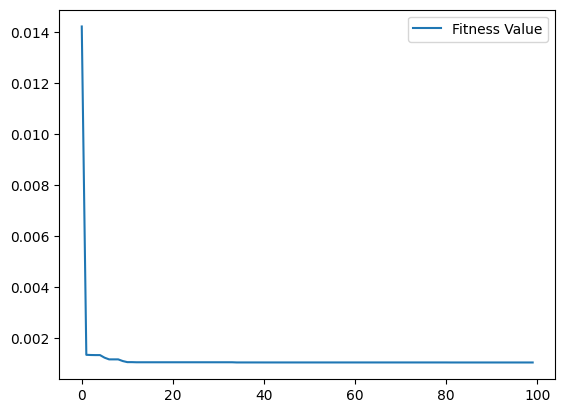

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



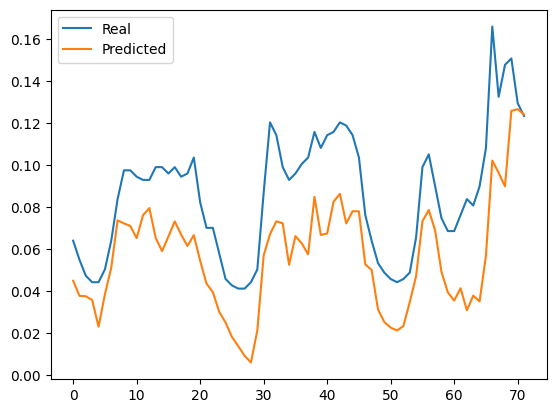





Mean Squared Error for the Test Set: 	 0.001012




Predictions Average: 	 0.056447




Predictions Median:	 0.057155






In [221]:
pso(120, 100, 3, 1)